# Information
$Writer: Junhyuck\ Woo$ <br>
$Std.ID: 20145337$<br>
$Assignment08:\ Forward\ Propagation\ in\ the\ Neural\ Networks$<br>
$Deadline: May\ 21, 2020$
<hr>

# Library

In [0]:
import matplotlib.pyplot as plt; import numpy as np

# Data

In [0]:
file_data   = "/content/drive/My Drive/Spring|2020/Machine_Learning/CAU-MachineLearning/Assignment08/mnist_test.csv"
handle_file = open(file_data, "r")
data        = handle_file.readlines()
handle_file.close()

size_row    = 28    # height of the image
size_col    = 28    # width of the image

num_image   = len(data)
count       = 0     # count for the number of images

#
# make a matrix each column of which represents an images in a vector form 
#
list_image  = np.empty((size_row * size_col, num_image), dtype=float)
list_label  = np.empty(num_image, dtype=int)

for line in data:

    line_data   = line.split(',')
    label       = line_data[0]
    im_vector   = np.asfarray(line_data[1:])

    list_label[count]       = label
    list_image[:, count]    = im_vector / 255 

    count += 1

# Average Calculation

In [0]:
# Variable
num_digit_list = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
num_digit = len(num_digit_list)
avg_image = np.zeros((size_col * size_row, num_digit))

for i in range(num_image):
    # Get digit
    digit = list_label[i]

    # Count the number of each digit
    num_digit_list[digit] = num_digit_list[digit] + 1
    
    # Cumulate the image
    avg_image[:, digit] = avg_image[:, digit] + list_image[:, i]

# Divide as number of digit for getting the average image
for i in range(num_digit):
    avg_image[:, i] = avg_image[:, i] / num_digit_list[i]

# Generate Theta with N(0, 1)

# Comput the Forward Propagation

___
#Result

# 1. Average Image

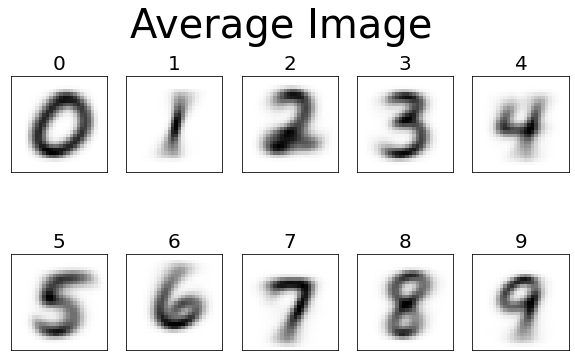

In [7]:
f1 = plt.figure(figsize=(10,6))
plt.suptitle("Average Image", fontsize = 40)
for i in range(10):

    im_vector   = avg_image[:, i]
    im_matrix   = im_vector.reshape((size_row, size_col))

    plt.subplot(2, 5, i+1)
    plt.title(i, fontsize=20)
    plt.imshow(im_matrix, cmap='Greys', interpolation='None')

    frame   = plt.gca()
    frame.axes.get_xaxis().set_visible(False)
    frame.axes.get_yaxis().set_visible(False)

plt.show()

# 2. Output of the Neural Network with Random Weights